<a href="https://colab.research.google.com/github/Masg1103/Social-Media-Impact-on-suicide-rates/blob/main/Social_Media_Impact_on_suicide_rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About Dataset**

Impact of Social Media on Suicide Rates

**Overview**

This dataset explores the impact of social media usage on suicide rates, presenting an analysis based on social media platform data and WHO suicide rate statistics. It is an insightful resource for researchers, data scientists, and analysts looking to understand the correlation between increased social media activity and suicide rates across different regions and demographics.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Social Media Impact on suicide rates/social-media-impact-on-suicide-rates.csv")
df.head()

,year,sex,Suicide Rate % change since 2010,Twitter user count % change since 2010,Facebook user count % change since 2010
0,2010,BTSX,100.000000,100.000000,100.000000
1,2010,FMLE,100.000000,100.000000,100.000000
2,2010,MLE,100.000000,100.000000,100.000000
3,2011,BTSX,98.681894,216.666667,138.980263
4,2011,FMLE,98.183773,216.666667,138.980263


The dataset provided has gender labels BTSX, FMLE, and MLE. Based on common data encoding conventions, these could represent:

- BTSX: Both sexes (combined data for males and females)
- FMLE: Female
- MLE: Male

In [4]:
df.shape

(30, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     30 non-null     int64  
 1   sex                                      30 non-null     object 
 2   Suicide Rate % change since 2010         30 non-null     float64
 3   Twitter user count % change since 2010   30 non-null     float64
 4   Facebook user count % change since 2010  30 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB


In [5]:
df.describe()

,year,Suicide Rate % change since 2010,Twitter user count % change since 2010,Facebook user count % change since 2010
count,30.000000,30.000000,30.000000,30.000000
mean,2014.500000,93.837274,462.777778,255.394737
std,2.921384,4.688130,177.734769,101.498351
min,2010.000000,85.269171,100.000000,100.000000
25%,2012.000000,89.530913,342.592593,173.684211
50%,2014.500000,94.478128,549.074074,245.394737
75%,2017.000000,98.051267,594.444444,350.164474
max,2019.000000,100.000000,629.629630,410.855263


In [8]:
# Rename columns for easier handling
df.columns = ['Year', 'Gender', 'SuicideRateChange', 'TwitterUserChange', 'FacebookUserChange']

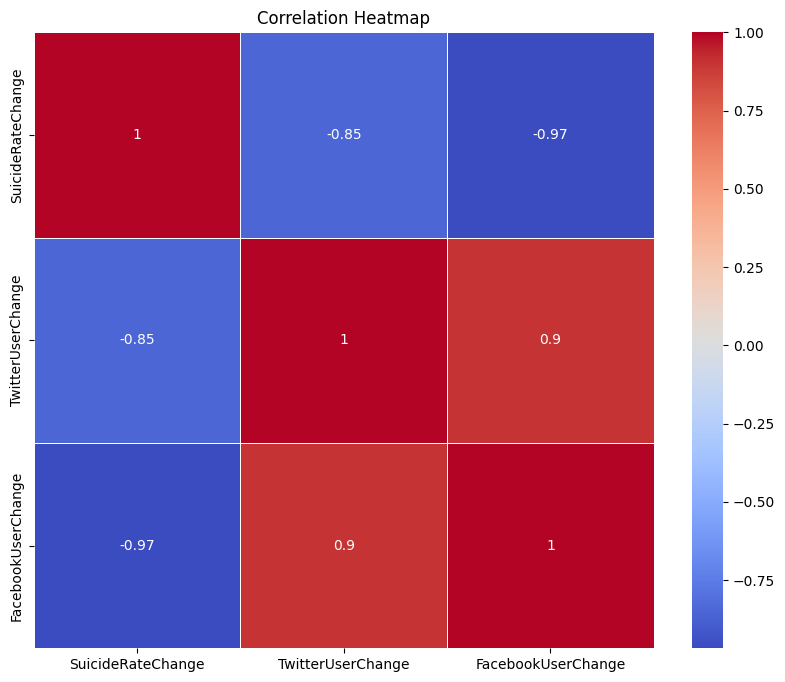

In [11]:
# . Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['SuicideRateChange', 'TwitterUserChange', 'FacebookUserChange']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

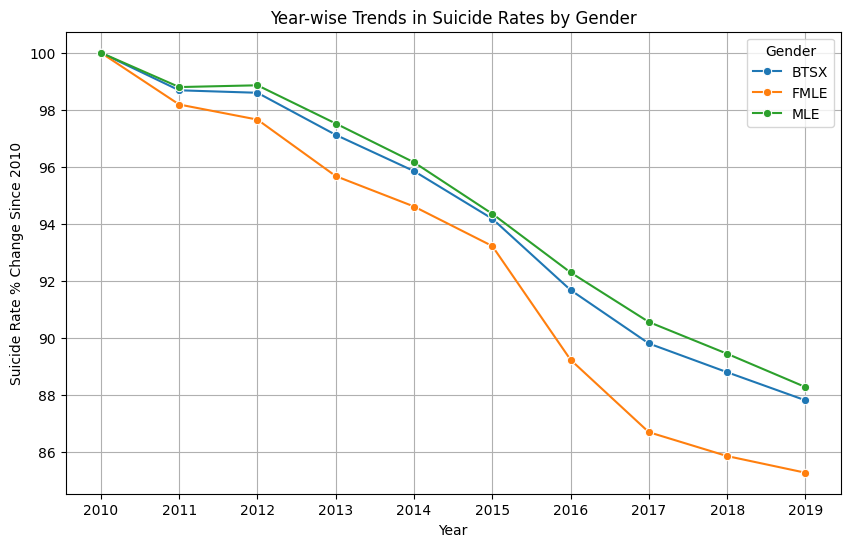

In [14]:
# 1. Year-wise trends in suicide rates
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='SuicideRateChange', hue='Gender', data=df, marker='o')
plt.title('Year-wise Trends in Suicide Rates by Gender')
plt.xlabel('Year')
plt.ylabel('Suicide Rate % Change Since 2010')
plt.xticks(df['Year'].unique())
plt.grid(visible=True)
plt.show()

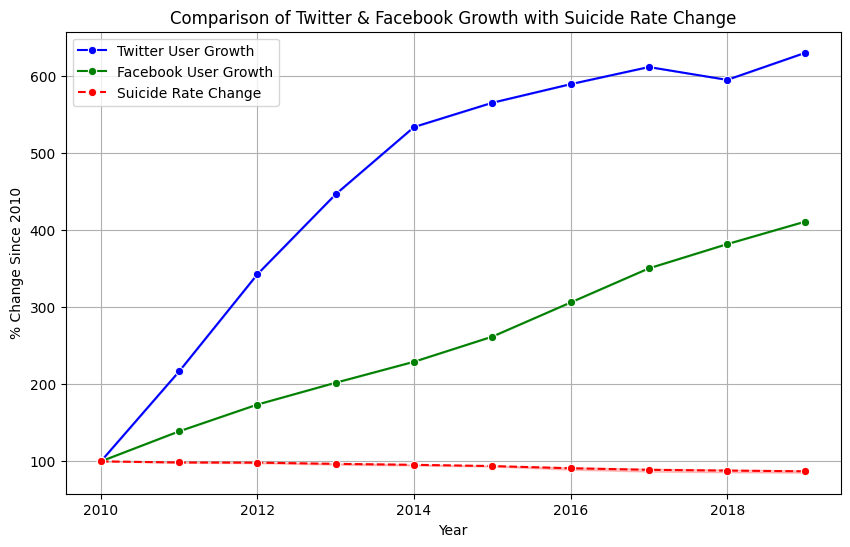

In [15]:
# 4. Comparing Twitter and Facebook growth with suicide rates
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='TwitterUserChange', data=df, label='Twitter User Growth', color='blue', marker='o')
sns.lineplot(x='Year', y='FacebookUserChange', data=df, label='Facebook User Growth', color='green', marker='o')
sns.lineplot(x='Year', y='SuicideRateChange', data=df, label='Suicide Rate Change', color='red', linestyle='--', marker='o')
plt.title('Comparison of Twitter & Facebook Growth with Suicide Rate Change')
plt.xlabel('Year')
plt.ylabel('% Change Since 2010')
plt.legend()
plt.grid(visible=True)
plt.show()

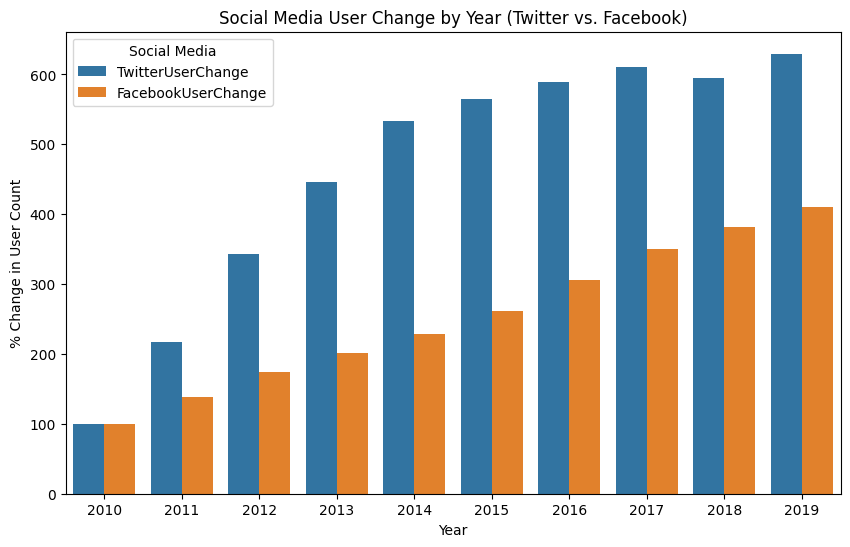

In [20]:
#Social Media User Change by Year (Twitter vs. Facebook)
melted_df = pd.melt(df,
id_vars=['Year'],
value_vars=['TwitterUserChange', 'FacebookUserChange'],
var_name='Social Media', value_name='% Change')

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='% Change', hue='Social Media', data=melted_df)
plt.title('Social Media User Change by Year (Twitter vs. Facebook)')
plt.xlabel('Year')
plt.ylabel('% Change in User Count')
plt.legend(title='Social Media', loc='upper left')
plt.show()

Correlation Matrix between Suicide Rate Change, Twitter User Growth, and Facebook User Growth:
                    SuicideRateChange  TwitterUserChange  FacebookUserChange
SuicideRateChange            1.000000          -0.845738           -0.967949
TwitterUserChange           -0.845738           1.000000            0.903146
FacebookUserChange          -0.967949           0.903146            1.000000

Correlation Matrix for Females:
                    SuicideRateChange  TwitterUserChange  FacebookUserChange
SuicideRateChange            1.000000          -0.871422           -0.991073
TwitterUserChange           -0.871422           1.000000            0.903146
FacebookUserChange          -0.991073           0.903146            1.000000

Correlation Matrix for Males:
                    SuicideRateChange  TwitterUserChange  FacebookUserChange
SuicideRateChange            1.000000          -0.860468           -0.991200
TwitterUserChange           -0.860468           1.000000            0.9

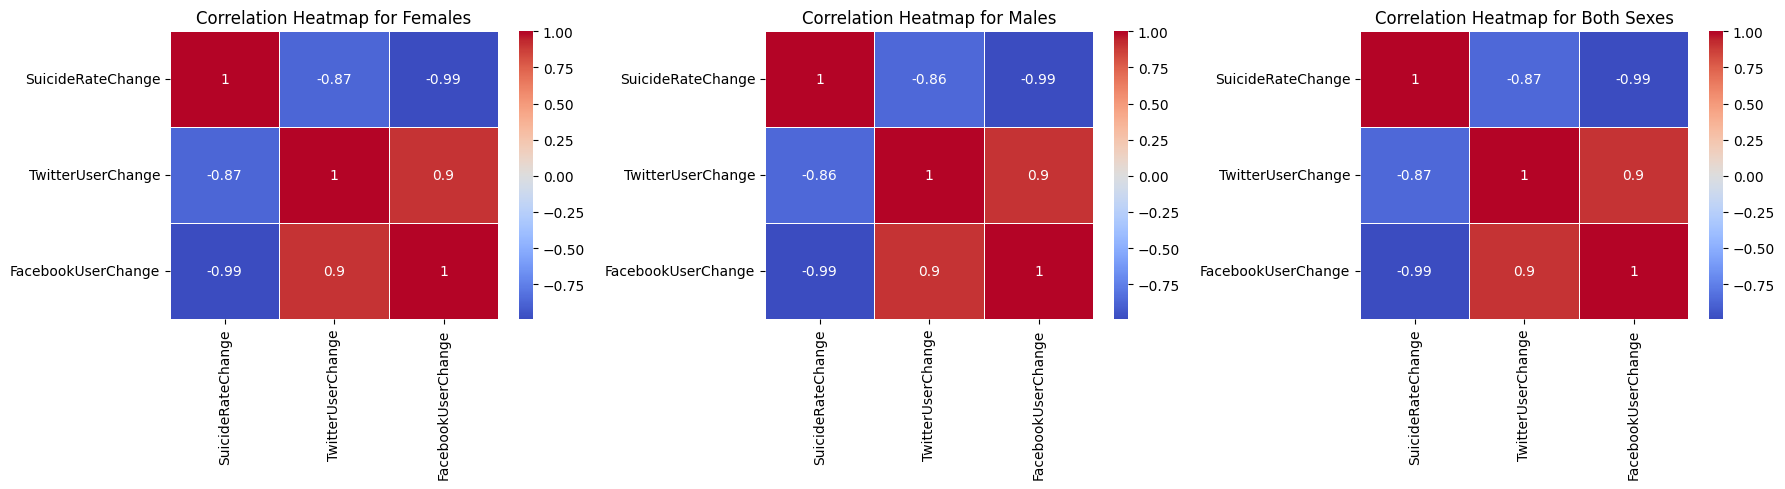

In [17]:
# 2. Correlation analysis between Twitter/Facebook growth and suicide rates

# Calculating correlations for the entire dataset
correlation_matrix = df[['SuicideRateChange', 'TwitterUserChange', 'FacebookUserChange']].corr()
print("Correlation Matrix between Suicide Rate Change, Twitter User Growth, and Facebook User Growth:")
print(correlation_matrix)

# Separate data by gender for analysis
btsx_data = df[df['Gender'] == 'BTSX']
fmle_data = df[df['Gender'] == 'FMLE']
mle_data = df[df['Gender'] == 'MLE']

# 3. Correlation between gender-specific suicide rates and social media usage trends

fmle_corr = fmle_data[['SuicideRateChange', 'TwitterUserChange', 'FacebookUserChange']].corr()
mle_corr = mle_data[['SuicideRateChange', 'TwitterUserChange', 'FacebookUserChange']].corr()
btsx_corr = btsx_data[['SuicideRateChange', 'TwitterUserChange', 'FacebookUserChange']].corr()

print("\nCorrelation Matrix for Females:")
print(fmle_corr)

print("\nCorrelation Matrix for Males:")
print(mle_corr)

print("\nCorrelation Matrix for Both Sexes:")
print(btsx_corr)

# Visualizing the correlation heatmaps for each gender
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.heatmap(fmle_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Females')

plt.subplot(1, 3, 2)
sns.heatmap(mle_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Males')

plt.subplot(1, 3, 3)
sns.heatmap(btsx_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Both Sexes')

plt.tight_layout()
plt.show()

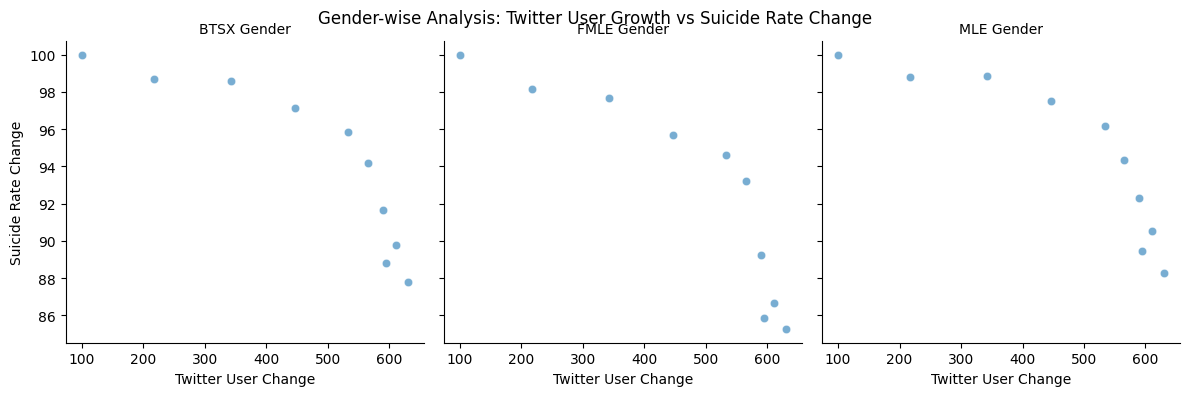

In [21]:
# 8. Facet Grid Analysis (Gender-wise Suicide Rate Change vs Social Media Growth)
g = sns.FacetGrid(df, col="Gender", col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x='TwitterUserChange', y='SuicideRateChange', alpha=0.6)
g.set_axis_labels("Twitter User Change", "Suicide Rate Change")
g.set_titles(col_template="{col_name} Gender")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Gender-wise Analysis: Twitter User Growth vs Suicide Rate Change")
plt.show()

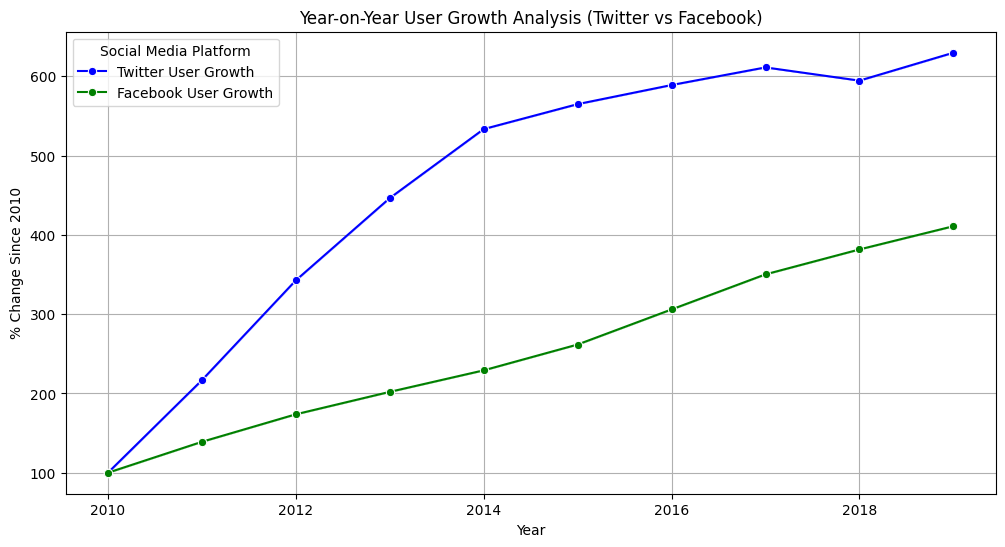

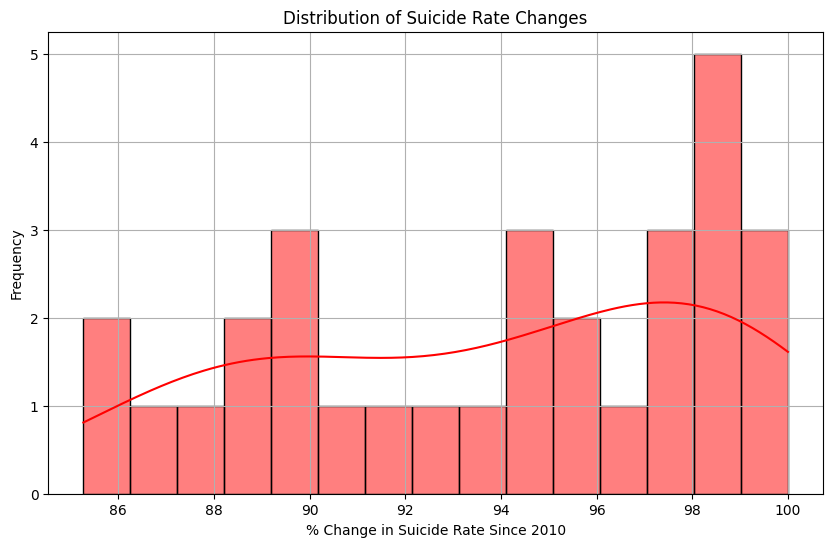

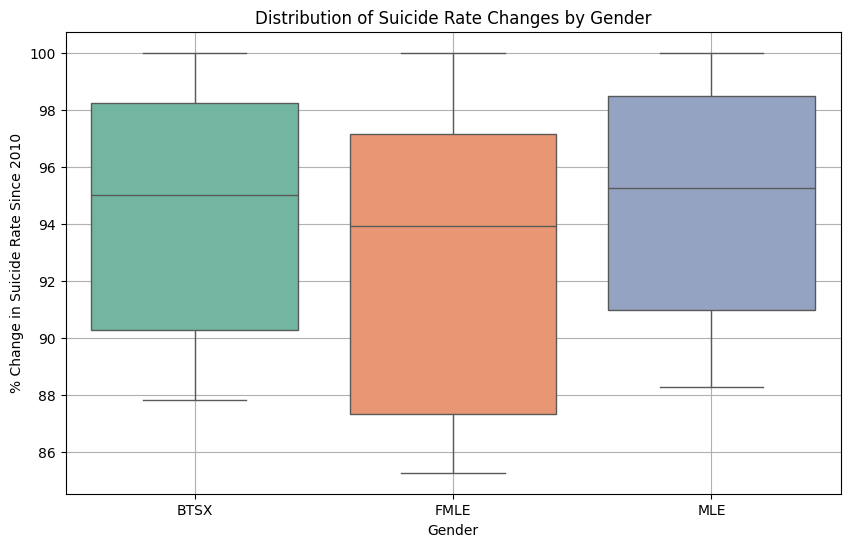

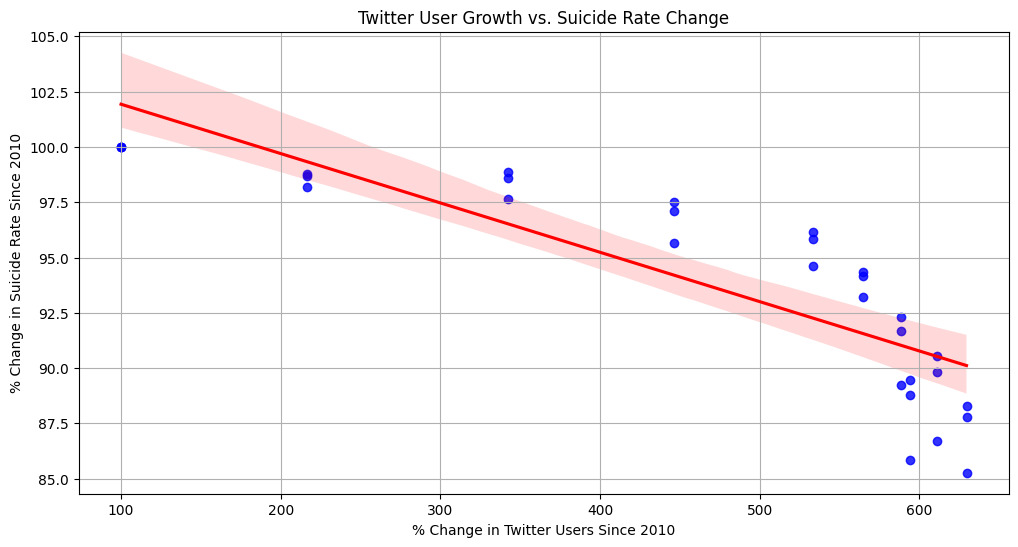

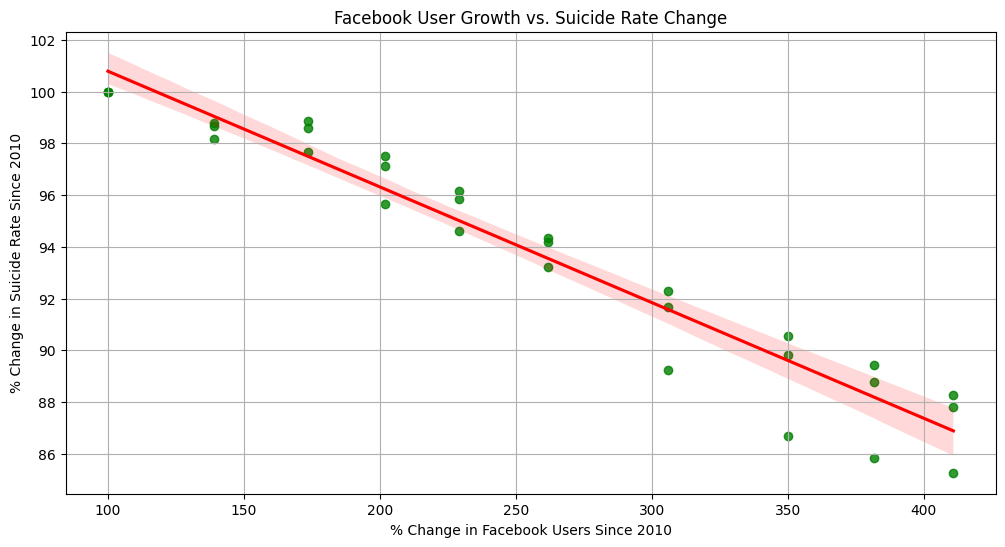

In [22]:
# 1. Year-on-Year Change Analysis for Twitter and Facebook Users
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='TwitterUserChange', data=df, label='Twitter User Growth', marker='o', color='blue')
sns.lineplot(x='Year', y='FacebookUserChange', data=df, label='Facebook User Growth', marker='o', color='green')
plt.title('Year-on-Year User Growth Analysis (Twitter vs Facebook)')
plt.xlabel('Year')
plt.ylabel('% Change Since 2010')
plt.legend(title='Social Media Platform')
plt.grid(visible=True)
plt.show()

# 2. Distribution of Suicide Rate Changes
plt.figure(figsize=(10, 6))
sns.histplot(df['SuicideRateChange'], bins=15, kde=True, color='red')
plt.title('Distribution of Suicide Rate Changes')
plt.xlabel('% Change in Suicide Rate Since 2010')
plt.ylabel('Frequency')
plt.grid(visible=True)
plt.show()

# 3. Boxplot of Suicide Rate Changes by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='SuicideRateChange', data=df, palette='Set2')
plt.title('Distribution of Suicide Rate Changes by Gender')
plt.xlabel('Gender')
plt.ylabel('% Change in Suicide Rate Since 2010')
plt.grid(visible=True)
plt.show()

# 4. Scatter Plot with Regression Line
plt.figure(figsize=(12, 6))
sns.regplot(x='TwitterUserChange', y='SuicideRateChange', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Twitter User Growth vs. Suicide Rate Change')
plt.xlabel('% Change in Twitter Users Since 2010')
plt.ylabel('% Change in Suicide Rate Since 2010')
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12, 6))
sns.regplot(x='FacebookUserChange', y='SuicideRateChange', data=df, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('Facebook User Growth vs. Suicide Rate Change')
plt.xlabel('% Change in Facebook Users Since 2010')
plt.ylabel('% Change in Suicide Rate Since 2010')
plt.grid(visible=True)
plt.show()